<div style="display: flex;">
<img src="https://conocedores.com/wp-content/uploads/2016/06/netflixn.jpg" alt="Netflix logo" width=500 />
<img src="https://qubefilm.com/wp-content/uploads/2021/03/imdb-logo.png" alt="IMDb logo" width=500 />
</div>

<h1 style="font-size: 80px; font-weight: bold; text-align: center;">PRELIMINARY EDA</h1>

In [1]:
import pandas as pd

# Load the data
df = pd.read_excel(
    io='../../data/FULLY_COMBINED_DATASET.xlsx',
    sheet_name='FULLY_COMBINED_DATASET',
    engine='openpyxl',
    usecols=[
        'tconst',
        'primaryTitle',
        'originalTitle',
        'startYear',
        'runtimeMinutes',
        'genres',
        'averageRating',
        'numVotes',
        'nfShowId',
        'type',
        'title',
        'director',
        'cast',
        'country',
        'dateAdded',
        'rating',
        'listedIn',
        'description',
        'availableGlobally',
        'hoursViewed',
    ]
).drop_duplicates(
    ignore_index=True
).replace(
    "\\N",
    ''
).astype({
    'startYear': 'int32',
    'runtimeMinutes': 'int32',
    'averageRating': 'float64',
    'numVotes': 'int32',
    'dateAdded': 'datetime64[ns]',
    'hoursViewed': 'int32',
    'listedIn': 'category',
    'availableGlobally': 'category',
    'country': 'category'
    })

df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             1858 non-null   object        
 1   primaryTitle       1858 non-null   object        
 2   originalTitle      1858 non-null   object        
 3   startYear          1858 non-null   int32         
 4   runtimeMinutes     1858 non-null   int32         
 5   genres             1858 non-null   object        
 6   averageRating      1858 non-null   float64       
 7   numVotes           1858 non-null   int32         
 8   nfShowId           1858 non-null   object        
 9   type               1858 non-null   object        
 10  title              1858 non-null   object        
 11  director           1804 non-null   object        
 12  cast               1770 non-null   object        
 13  country            1776 non-null   category      
 14  dateAdde

In [2]:
df.describe(include='all').T

count  unique  \
tconst               1858    1858   
primaryTitle       1858.0  1858.0   
originalTitle      1858.0  1858.0   
startYear          1858.0     NaN   
runtimeMinutes     1858.0     NaN   
genres               1858     266   
averageRating      1858.0     NaN   
numVotes           1858.0     NaN   
nfShowId             1858    1858   
type                 1858       2   
title              1858.0  1858.0   
director             1804    1495   
cast                 1770    1767   
country              1776     296   
dateAdded            1858     NaN   
rating               1858      12   
listedIn             1858     204   
description          1858    1858   
availableGlobally    1858       2   
hoursViewed        1858.0     NaN   

                                                                 top  freq  \
tconst                                                     tt7867670     1   
primaryTitle                                                   122.0   1.0   
originalTitle                                                  122.0   1.0   
startYear                                                        NaN   NaN   
runtimeMinutes                                                   NaN   NaN   
genres                                                         drama   108   
averageRating                                                    NaN   NaN   
numVotes                                                         NaN   NaN   
nfShowId                                                       s2444     1   
type                                                           movie  1822   
title                                                          122.0   1.0   
director                                         cathy garcia-molina     9   
cast                                                    shawn mendes     2   
country                                                united states   588   
dateAdded                                                        NaN   NaN   
rating                                                         tv-ma   653   
listedIn                      comedies, dramas, international movies   107   
description        after an awful accident, a couple admitted to ...     1   
availableGlobally                                                 no  1199   
hoursViewed                                                      NaN   NaN   

                                            mean                  min  \
tconst                                       NaN                  NaN   
primaryTitle                                 NaN                  NaN   
originalTitle                                NaN                  NaN   
startYear                            2014.182454               1954.0   
runtimeMinutes                        108.502691                  0.0   
genres                                       NaN                  NaN   
averageRating                           6.273789                  1.9   
numVotes                            59029.531216                  6.0   
nfShowId                                     NaN                  NaN   
type                                         NaN                  NaN   
title                                        NaN                  NaN   
director                                     NaN                  NaN   
cast                                         NaN                  NaN   
country                                      NaN                  NaN   
dateAdded          2019-10-06 14:20:16.792249856  2011-05-17 00:00:00   
rating                                       NaN                  NaN   
listedIn                                     NaN                  NaN   
description                                  NaN                  NaN   
availableGlobally                            NaN                  NaN   
hoursViewed                       2554897.739505             100000.0   

                                   25%                  50%  \
tconst

# Let's look at some frequency and density graphs

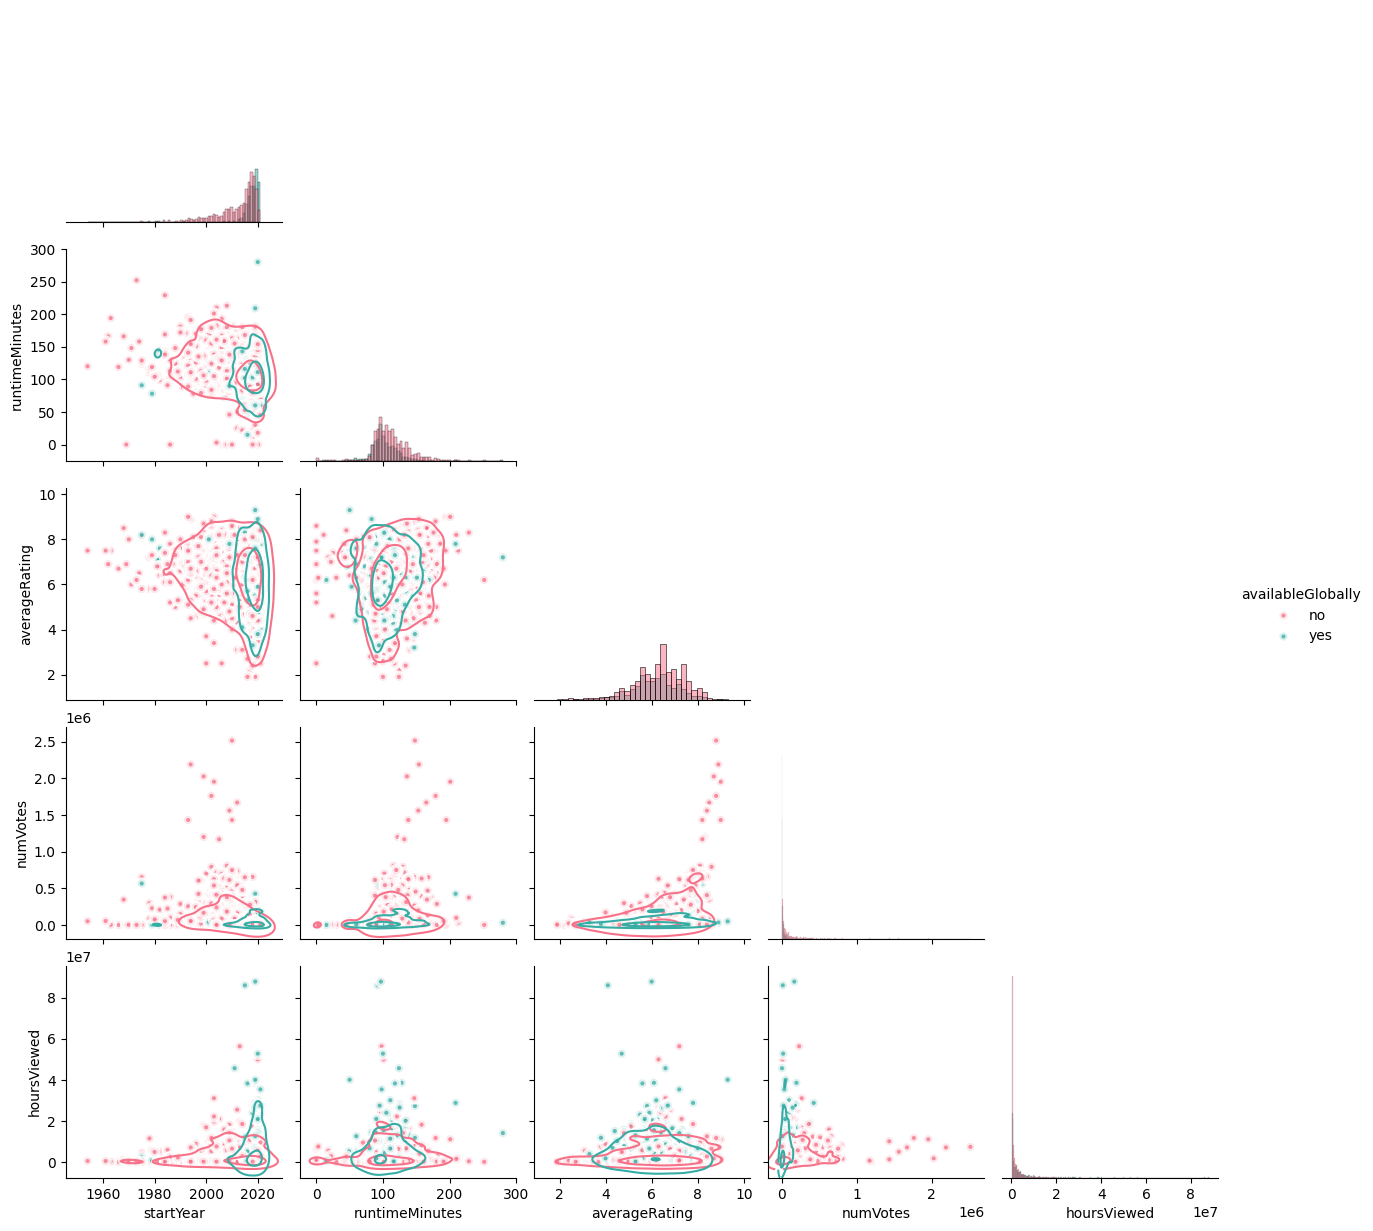

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns


# Create a pairplot
sns.pairplot(
    data=df,
    kind='scatter',
    hue='availableGlobally',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.8,
        'linewidth': 3
    },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=2
        )
    ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

In [4]:
gS = df.listedIn.value_counts().head(5).index.to_list()
splot_df = df.loc[df.listedIn.isin(gS), :].astype({'listedIn': 'object'}).astype({'listedIn': 'category'})
list(splot_df.listedIn.cat.categories)

['comedies, dramas, international movies',
 'comedies, international movies, romantic movies',
 'documentaries',
 'dramas, international movies',
 'dramas, international movies, romantic movies']

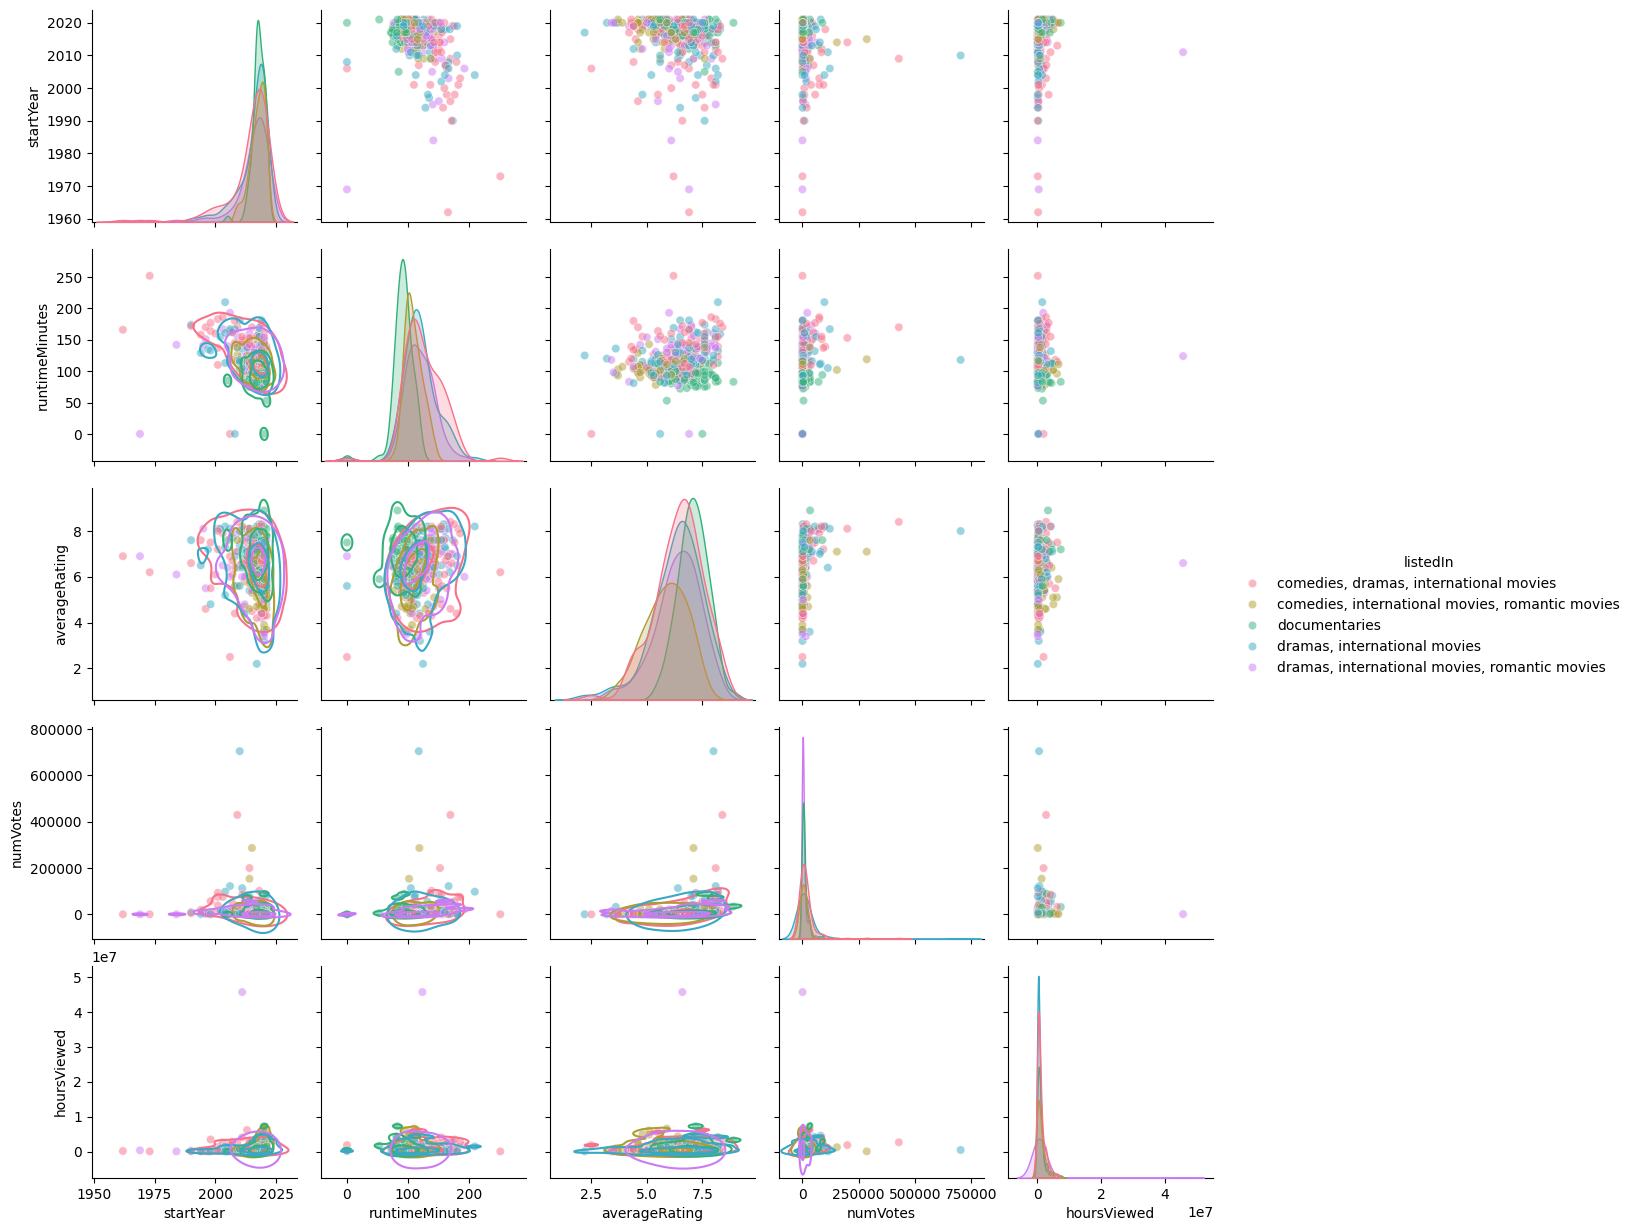

In [5]:
sns.pairplot(splot_df,
             hue='listedIn',
             kind='scatter',
             plot_kws={'alpha': 0.5},
             palette=sns.color_palette('husl', n_colors=5)
             ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

## Let's create separate subsets for movie and tv content, respectively.

In [6]:
# Create copies of the dataframe for each type
tv_df = df[df['type'] == 'tv show'].copy()
mv_df = df[df['type'] == 'movie'].copy()

## We'll run pairplot again using just the tv data.

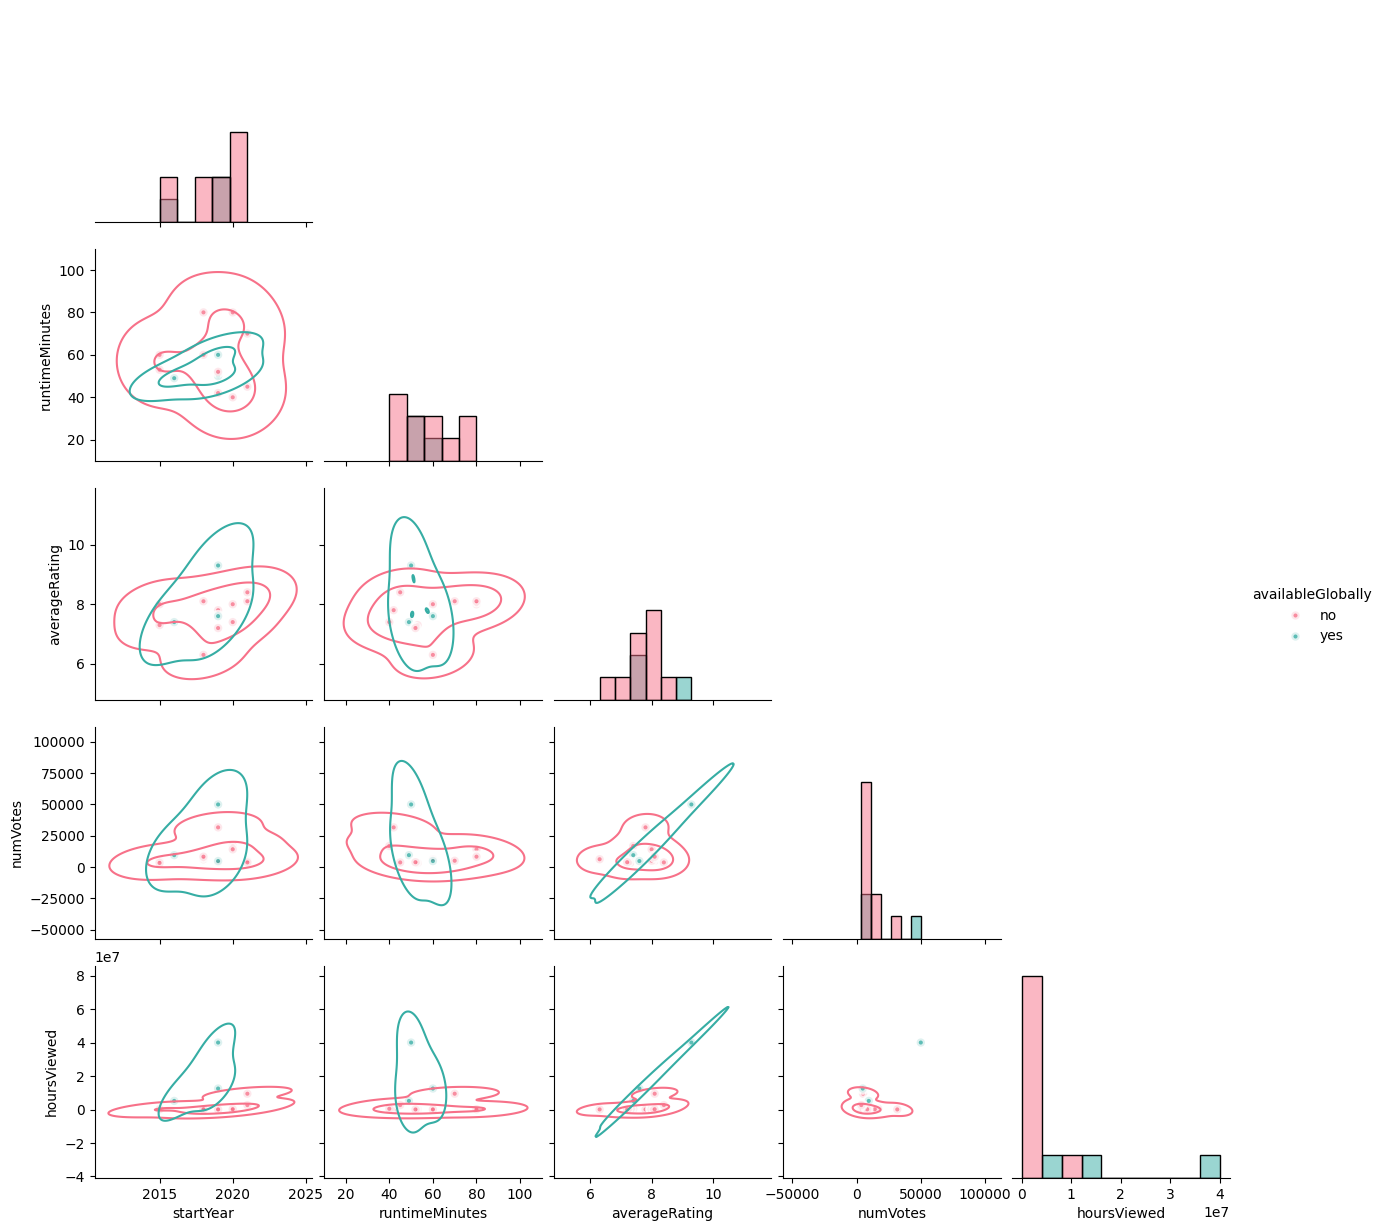

In [7]:
# Create a pairplot
sns.pairplot(
    data=tv_df.loc[
        (
            tv_df['runtimeMinutes'] >= 40
        ) & (
            tv_df['runtimeMinutes'] <= 180
        ) & (
            tv_df['numVotes'] <= 1000000
        ) & (
            tv_df['startYear'] >= 2010
        ) & (
            tv_df['numVotes'] >= 1940
        )
    ],
    kind='scatter',
    hue='availableGlobally',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.8,
        'linewidth': 3
    },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=2
        )
    ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

## Now just films

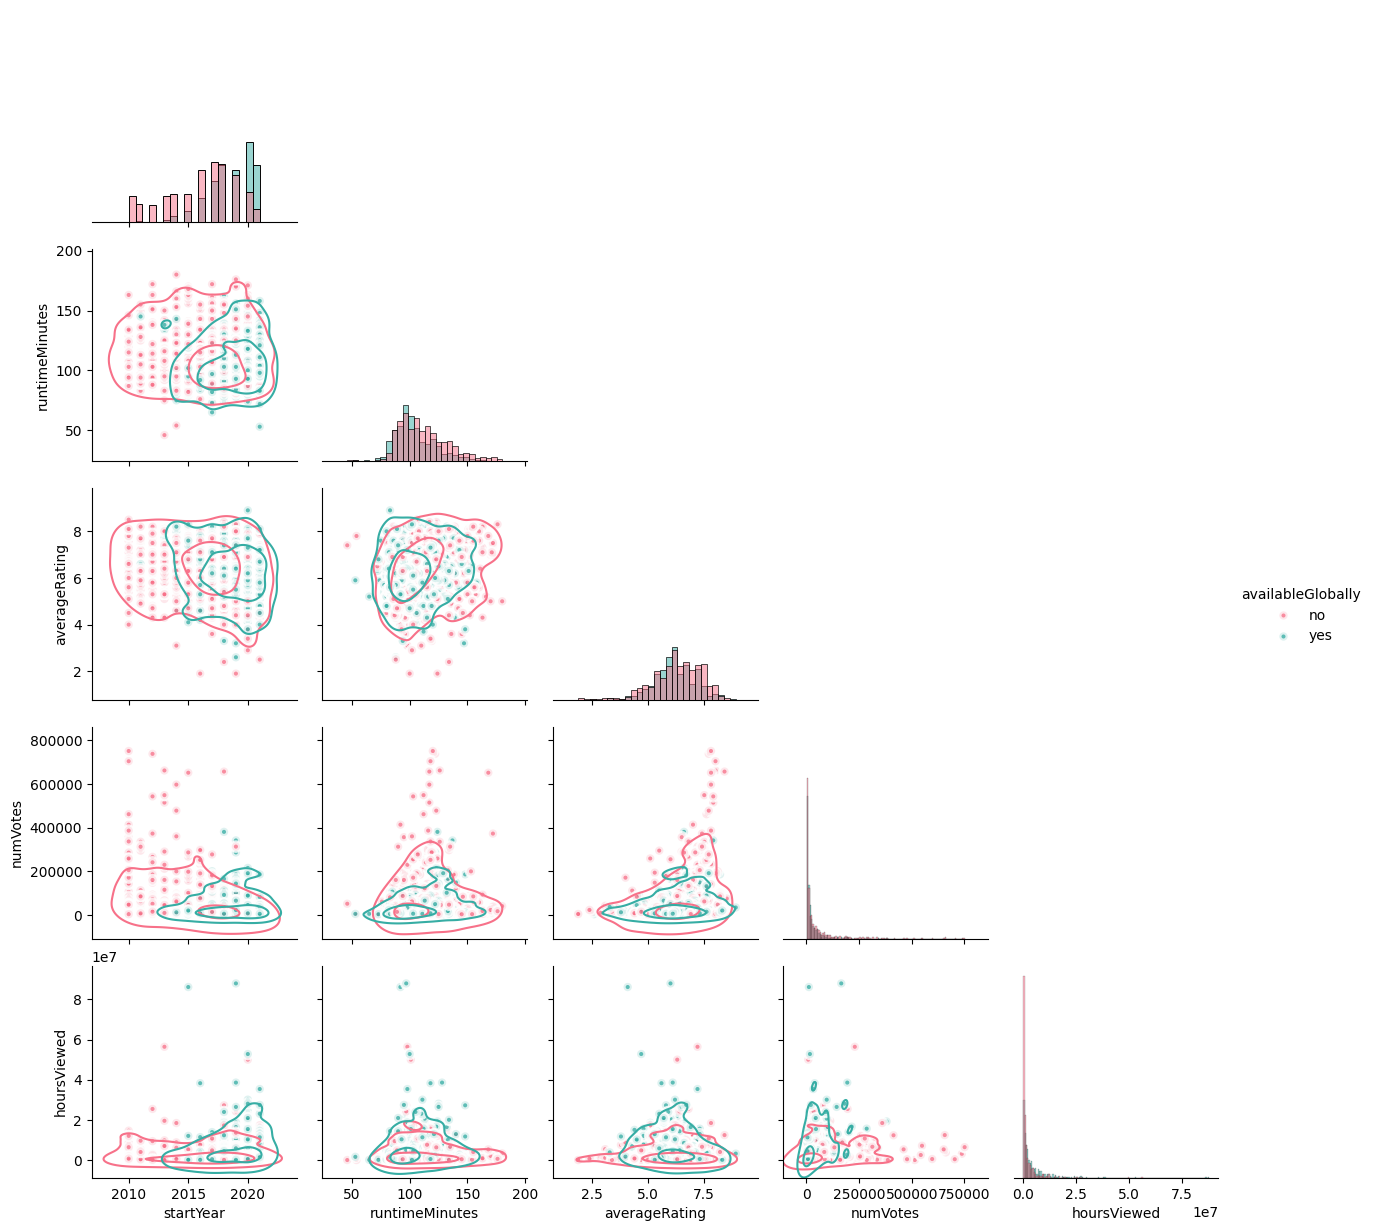

In [8]:
# Create a pairplot
sns.pairplot(
    data=mv_df.loc[
        (
            mv_df['runtimeMinutes'] >= 40
        ) & (
            mv_df['runtimeMinutes'] <= 180
        ) & (
            mv_df['numVotes'] <= 1000000
        ) & (
            mv_df['startYear'] >= 2010
        ) & (
            mv_df['numVotes'] >= 1940
        )
    ],
    kind='scatter',
    hue='availableGlobally',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.8,
        'linewidth': 3
    },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=2
        )
    ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

## Hued on 'country'

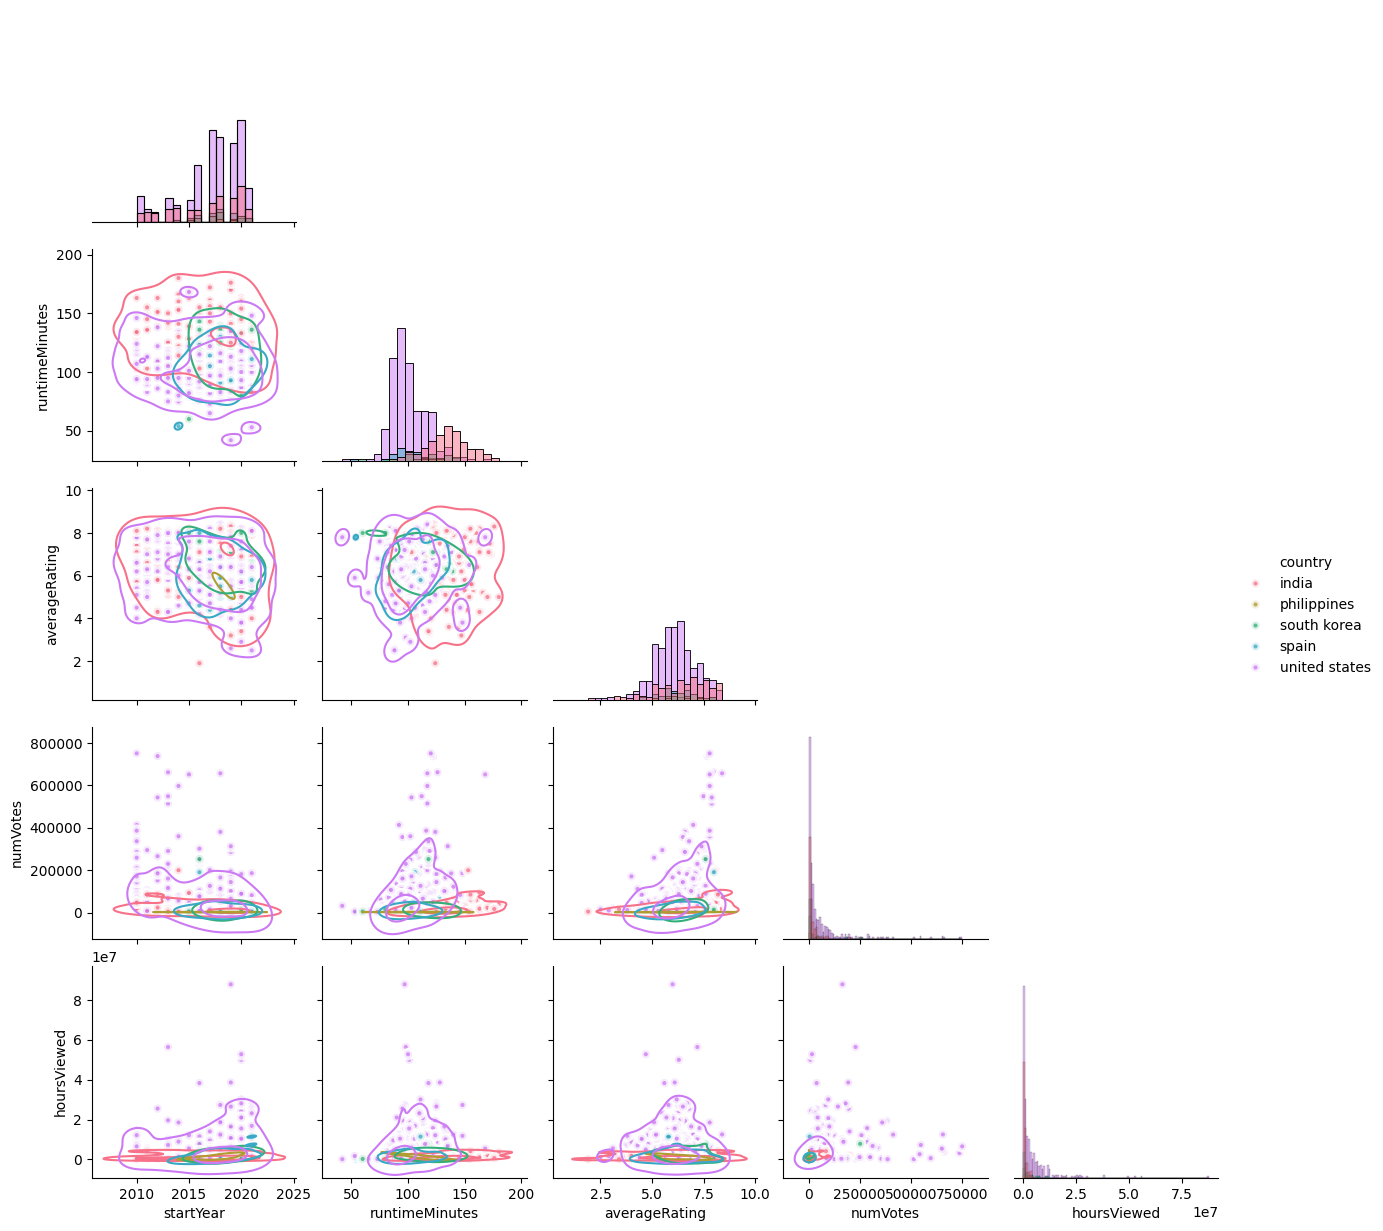

In [9]:
# create a temporary dataframe with the top 10 countries
tmpdf = df.loc[
    df['country'].isin(
        df.country.value_counts().head(5).index
    ),
    :
].astype({
    'country': 'object'
}).astype({
    'country': 'category'
})


# Create a pairplot
sns.pairplot(
        data=tmpdf.loc[
        (
            df['runtimeMinutes'] >= 40
        ) & (
            df['runtimeMinutes'] <= 180
        ) & (
            df['numVotes'] <= 1000000
        ) & (
            df['startYear'] >= 2010
        ) & (
            df['numVotes'] >= 1940
        )
    ],
    kind='scatter',
    hue='country',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.8,
        'linewidth': 3
    },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=5
        )
    ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

In [10]:
horror_tv_df = tv_df[tv_df['listedIn'].str.contains('horror',
                                                    na=False,
                                                    case=False)].copy()
horror_tv_df.index.size

1

In [11]:
horror_mv_df = mv_df[mv_df['listedIn'].str.contains('horror',
                                                    na=False,
                                                    case=False)].copy()
horror_mv_df.index.size

123

# Looking at just the movies, how stable is the 'availableGlobally' phenomenon?

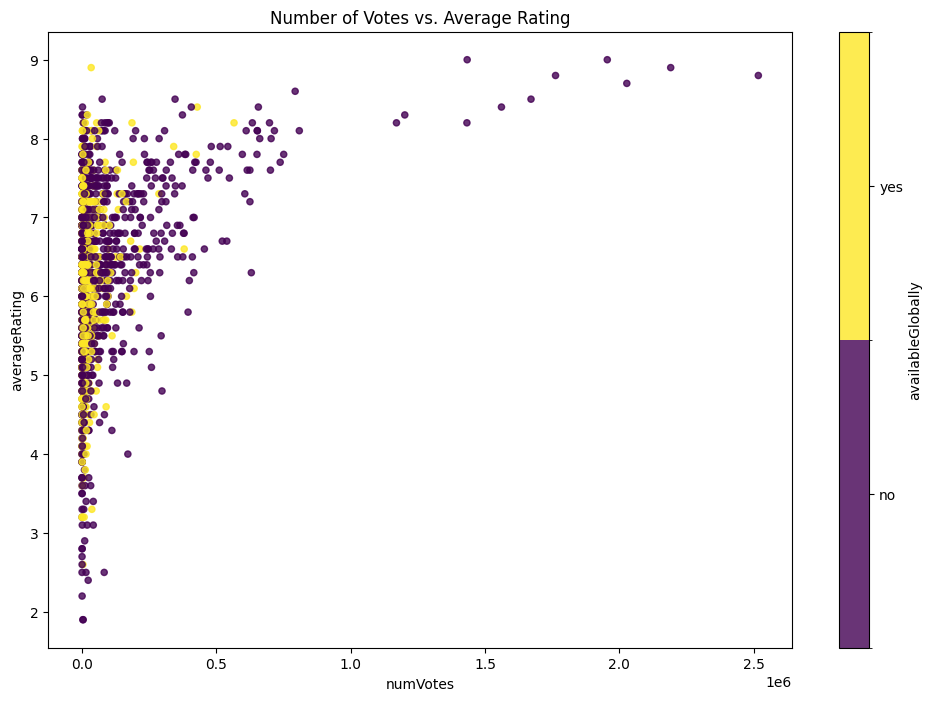

In [12]:
mv_df.plot(kind='scatter',
        x='numVotes',
        y='averageRating',
        alpha=0.8,
        c='availableGlobally',
        cmap='viridis',
        figsize=(12, 8),
        title='Number of Votes vs. Average Rating'
)

plt.show();

# And for only TV content?

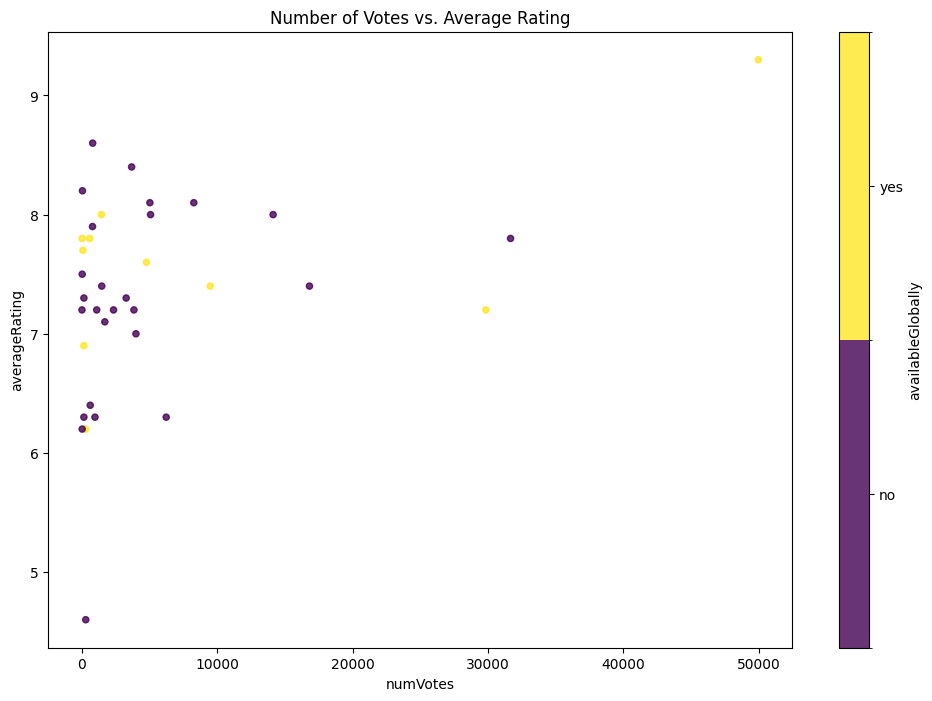

In [13]:
tv_df.plot(kind='scatter',
        x='numVotes',
        y='averageRating',
        alpha=0.8,
        c='availableGlobally',
        cmap='viridis',
        figsize=(12, 8),
        title='Number of Votes vs. Average Rating'
)

plt.show();

<hr />

<hr />

# We'll distill the 'listedIn' column into the following macro-categories: _action_, _comedy_, _documentary_, _drama_, _family_, _horror_, _romance_.  There will initially be overlap amongst the subsets, but this will be addressed, as needed, in an ongoing fashion.

In [14]:
action_df = df.loc[df['listedIn'].str.contains('action &'), :].copy().astype({'listedIn': 'object'})
action_df.loc[:, 'listedIn'] = 'action'

comedy_df = df.loc[df['listedIn'].str.contains('comedies'), :].copy().astype({'listedIn': 'object'})
comedy_df.loc[:, 'listedIn'] = 'comedy'

documentary_df = df.loc[df['listedIn'].str.contains('documentaries'), :].copy().astype({'listedIn': 'object'})
documentary_df.loc[:, 'listedIn'] = 'documentary'

drama_df = df.loc[df['listedIn'].str.contains('drama'), :].copy().astype({'listedIn': 'object'})
drama_df.loc[:, 'listedIn'] = 'drama'

family_df = df.loc[df['listedIn'].str.contains('children'), :].copy().astype({'listedIn': 'object'})
family_df.loc[:, 'listedIn'] = 'family'

horror_df = df.loc[df['listedIn'].str.contains('horror'), :].copy().astype({'listedIn': 'object'})
horror_df.loc[:, 'listedIn'] = 'horror'

romance_df = df.loc[df['listedIn'].str.contains('romance'), :].copy().astype({'listedIn': 'object'})
romance_df.loc[:, 'listedIn'] = 'romance'

macro_df = pd.concat([
    action_df,
    comedy_df,
    documentary_df,
    drama_df,
    family_df,
    horror_df,
    romance_df
]).astype({'listedIn': 'category'})

macro_df.sample(5)

tconst                       primaryTitle  \
1124  tt0107818                       philadelphia   
864   tt0110852                   love on delivery   
993   tt4335954                   my birthday song   
1772  tt4284010        what happened, miss simone?   
289   tt0367594  charlie and the chocolate factory   

                          originalTitle  startYear  runtimeMinutes  \
1124                       philadelphia       1993             125   
864                     poh wai ji wong       1994             100   
993                    my birthday song       2018              95   
1772        what happened, miss simone?       2015             101   
289   charlie and the chocolate factory       2005             115   

                           genres  averageRating  numVotes nfShowId   type  \
1124                        drama            7.7    255949    s7736  movie   
864         action,comedy,romance            6.8      3652    s7348  movie   
993                      thriller            5.5       310    s4797  movie   
1772  biography,documentary,music            7.6     14713    s5907  movie   
289       adventure,comedy,family            6.7    522063    s6447  movie   

                                  title        director  \
1124                       philadelphia  jonathan demme   
864                    love on delivery    stephen chow   
993                    my birthday song      samir soni   
1772        what happened, miss simone?      liz garbus   
289   charlie and the chocolate factory      tim burton   

                                                   cast  \
1124  tom hanks, denzel washington, jason robards, m...   
864             stephen chow, christy chung, ng man-tat   
993   sanjay suri, nora fatehi, zenia starr, suparna...   
1772                                                NaN   
289   johnny depp, freddie highmore, david kelly, he...   

                            country  dateAdded rating     listedIn  \
1124                  united states 2019-07-01  pg-13        drama   
864                       hong kong 2018-08-16  tv-14       comedy   
993                           india 2018-07-01  tv-14        drama   
1772                  united states 2015-06-26  tv-14  documentary   
289   united kingdom, united states 2020-01-01     pg       family   

                                            description availableGlobally  \
1124  philadelphia attorney andrew beckett launches ...                no   
864   to prove himself to a love interest, a deliver...                no   
993   after a wild night of impulse and infidelity, ...                no   
1772  using never-before-heard recordings, rare arch...               yes   
289   the eccentric willy wonka opens the doors of h...                no   

      hoursViewed  
1124       100000  
864        200000  
993        100000  
1772       500000  
289       6300000

In [15]:
macro_df[macro_df['listedIn'] == 'drama']

tconst         primaryTitle       originalTitle  startYear  \
1      tt6214928                 1922                1922       2017   
4     tt11640412  #friendbutmarried 2  #temantapimenikah2       2020   
5      tt5089786           100 meters          100 metros       2016   
6     tt11799742           100% halal          100% halal       2020   
9     tt10816484          18 presents           18 regali       2020   
...          ...                  ...                 ...        ...   
1851  tt10549212            the trial         il processo       2019   
1852  tt12263568             together            together       2009   
1855  tt11120674          unstoppable       desenfrenadas       2020   
1856   tt7146600                 wolf              bÃ¶rÃ¼       2018   
1857  tt12458172        word of honor        shan he ling       2021   

      runtimeMinutes                  genres  averageRating  numVotes  \
1                102      crime,drama,horror            6.2     70877   
4                100  biography,comedy,drama            6.9       356   
5                108  biography,comedy,drama            7.5      6870   
6                100                   drama            6.3        75   
9                115                   drama            6.9      4188   
...              ...                     ...            ...       ...   
1851              52          crime,thriller            7.2      3844   
1852              46                   drama            7.2         6   
1855              43            comedy,drama            7.2      1094   
1856              80     action,thriller,war            8.1      8267   
1857              45    action,drama,fantasy            8.4      3674   

     nfShowId     type                title           director  \
1       s5208    movie                 1922       zak hilditch   
4       s2325    movie  #friendbutmarried 2      rako prijanto   
5       s5578    movie           100 meters     marcel barrena   
6       s1434    movie           100% halal      jastis arimba   
9       s2551    movie          18 presents    francesco amato   
...       ...      ...                  ...                ...   
1851    s2697  tv show            the trial  stefano lodovichi   
1852    s5196  tv show             together                NaN   
1855    s2873  tv show          unstoppable                NaN   
1856    s4277  tv show                 wolf                NaN   
1857     s833  tv show        word of honor          gary sing   

                                                   cast          country  \
1     thomas jane, molly parker, dylan schmid, kaitl...    united states   
4     adipati dolken, mawar de jongh, sari nila, von...        indonesia   
5     dani rovira, karra elejalde, alexandra jimÃ©ne...  portugal, spain   
6     anisa rahma, ariyo wahab, anandito dwis, fitri...        indonesia   
9     vittoria puccini, benedetta porcaroli, edoardo...            italy   
...                                                 ...              ...   
1851  vittoria puccini, francesco scianna, camilla f...            italy   
1852  jeanette aw, dai xiangyu, elvin ng, eelyn kok,...        singapore   
1855  tessa ia, bÃ¡rbara lÃ³pez, lucÃ­a uribe, coty ...           mexico   
1856  ahu tÃ¼rkpenÃ§e, serkan Ã§ayoÄŸlu, murat arkin...           turkey   
1857  zhang zhehan, gong jun, zhou ye, asher ma, sun...              NaN   

      dateAdded rating listedIn  \
1    2017-10-20  tv-ma    drama   
4    2020-06-28   tv-g    drama   
5    2017-03-10  tv-ma    drama   
6    2021-01-07  tv-14    drama   
9    2020-05-08  tv-ma    drama   
...         ...    ...      ...   
1851 2020-04-10  tv-ma    drama   
1852 2017-11-01  tv-14    drama   
1855 2020-02-28  tv-ma    drama   
1856 2018-12-21  tv-ma    drama   
1857 2021-05-28  tv-14    drama   

                                            description availableGlobally  \
1     a farmer pens a confession admitting to his wi...         

# Let's see if this broad brush approach yields any useful insights.

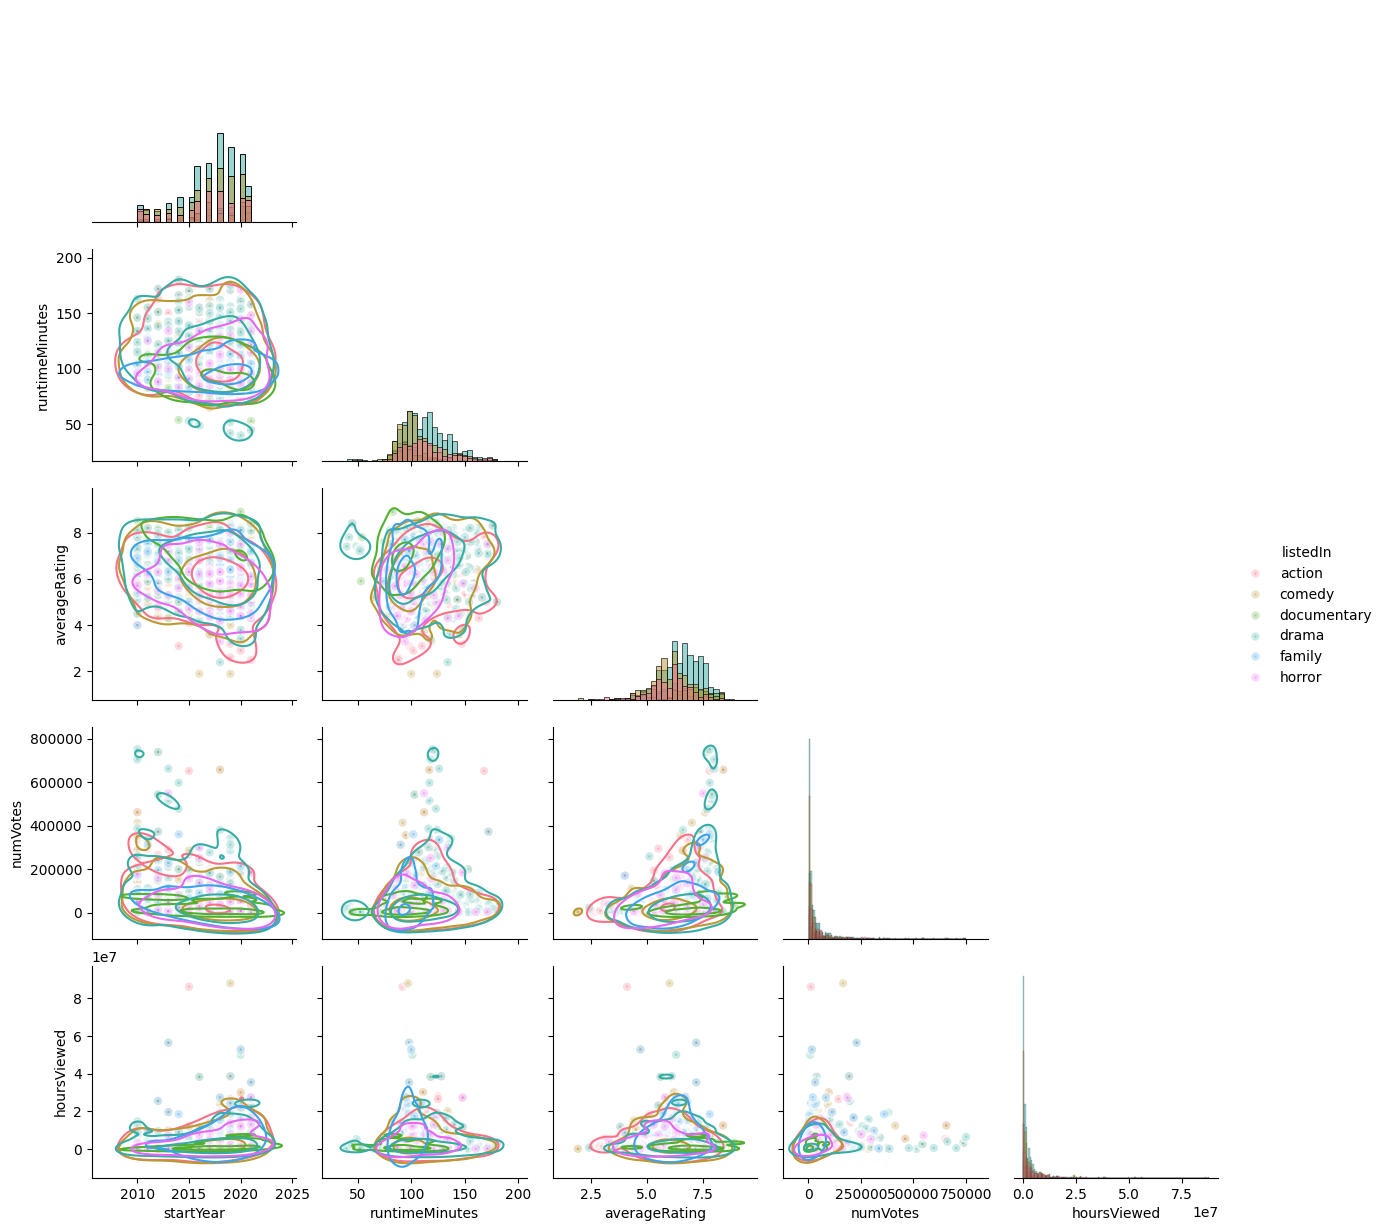

In [16]:
# Create a pairplot
sns.pairplot(
    data=macro_df.loc[
        (
            macro_df['runtimeMinutes'] >= 40
        ) & (
            macro_df['runtimeMinutes'] <= 180
        ) & (
            macro_df['numVotes'] <= 1000000
        ) & (
            macro_df['startYear'] >= 2010
        ) & (
            macro_df['numVotes'] >= 1940
        )
    ],
    kind='scatter',
    hue='listedIn',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.5,
        'linewidth': 4
    },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=6
        )
    ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

# Let's increase the contrast between genres by removing duplicates among categories.  This is a first, rough pass, and should be refined based on initial examination.

In [17]:
dropped = macro_df.drop('listedIn', axis=1).drop_duplicates()

dropped_df = pd.merge(
    left=(l := dropped.iloc[:, :8]),
    right=(r := macro_df.iloc[:, 8:]),
    left_on=l.index,
    right_on=r.index
).drop_duplicates(
    subset=[
        'title'
    ],
    keep=False,
    ignore_index=True
).drop('key_0',
       axis=1
      )

dropped_df.info(
    memory_usage='deep'
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1270 entries, 0 to 1269
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             1270 non-null   object        
 1   primaryTitle       1270 non-null   object        
 2   originalTitle      1270 non-null   object        
 3   startYear          1270 non-null   int32         
 4   runtimeMinutes     1270 non-null   int32         
 5   genres             1270 non-null   object        
 6   averageRating      1270 non-null   float64       
 7   numVotes           1270 non-null   int32         
 8   nfShowId           1270 non-null   object        
 9   type               1270 non-null   object        
 10  title              1270 non-null   object        
 11  director           1236 non-null   object        
 12  cast               1185 non-null   object        
 13  country            1210 non-null   category      
 14  dateAdde

In [18]:
dropped_df.primaryTitle.duplicated().sum()

0

## Pairplots

### hue = 'type'

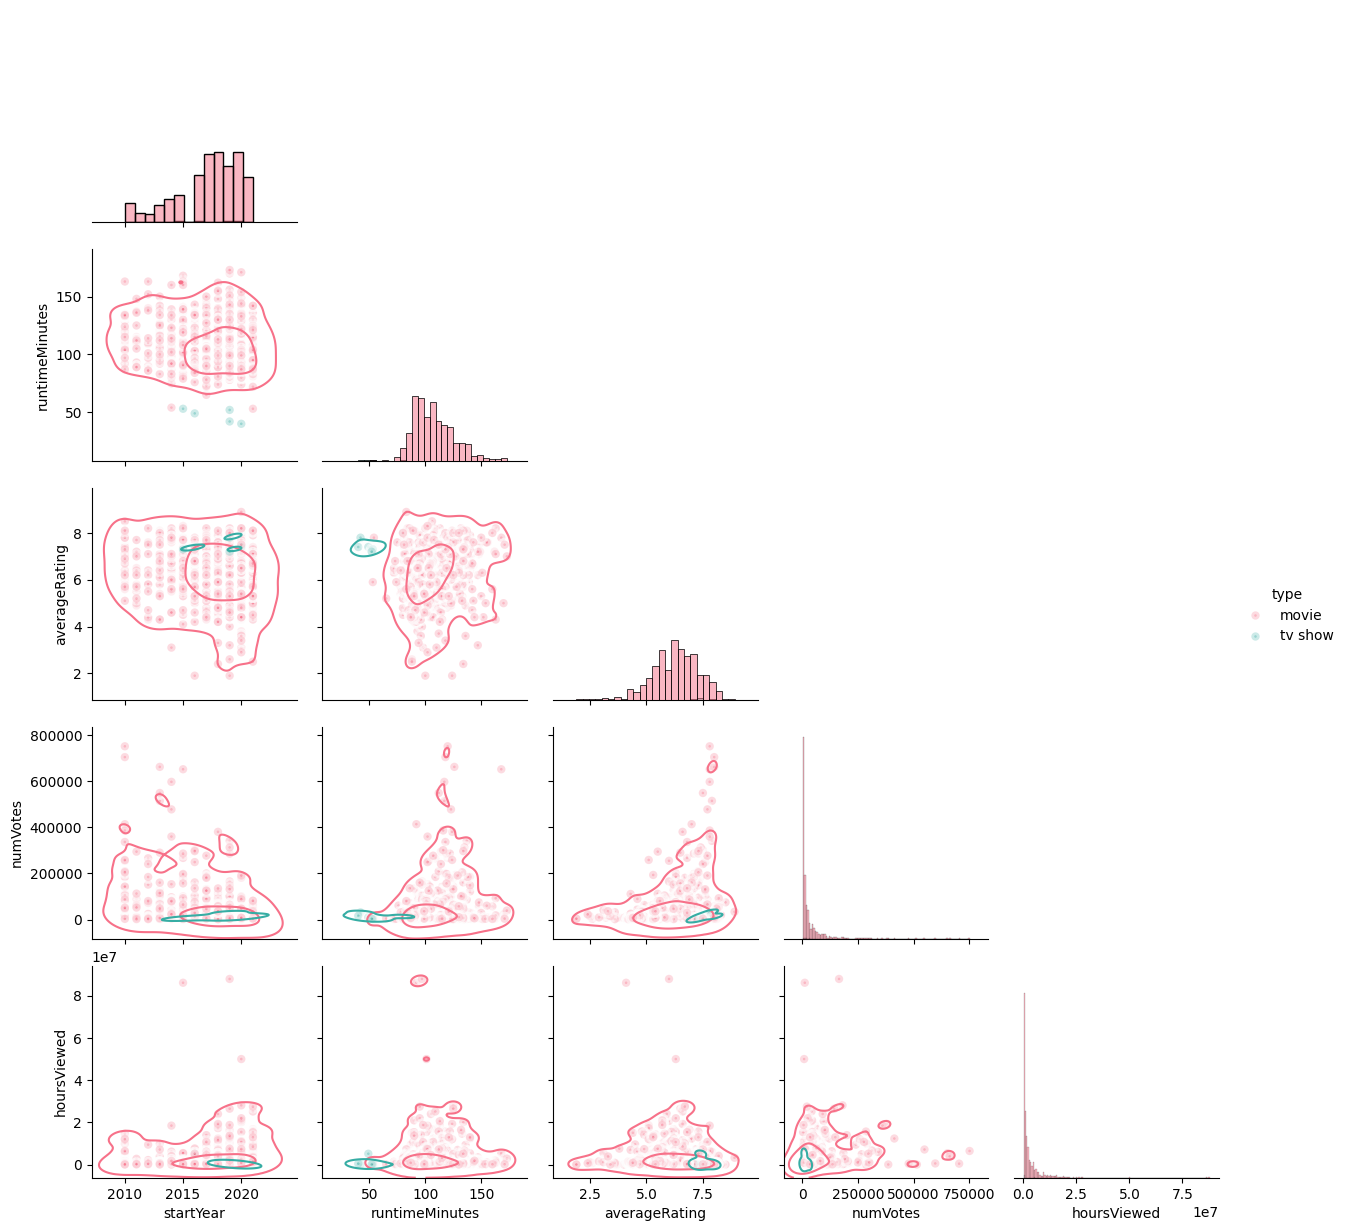

In [19]:
# Create a pairplot
sns.pairplot(
    data=dropped_df.loc[
        (
            dropped_df['runtimeMinutes'] >= 40
        ) & (
            dropped_df['runtimeMinutes'] <= 180
        ) & (
            dropped_df['numVotes'] <= 1000000
        ) & (
            dropped_df['startYear'] >= 2010
        ) & (
            dropped_df['numVotes'] >= 1940
        )
    ],
    kind='scatter',
    hue='type',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.5,
        'linewidth': 4
    },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=2
        )
    ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

### hue = 'availableGlobally'

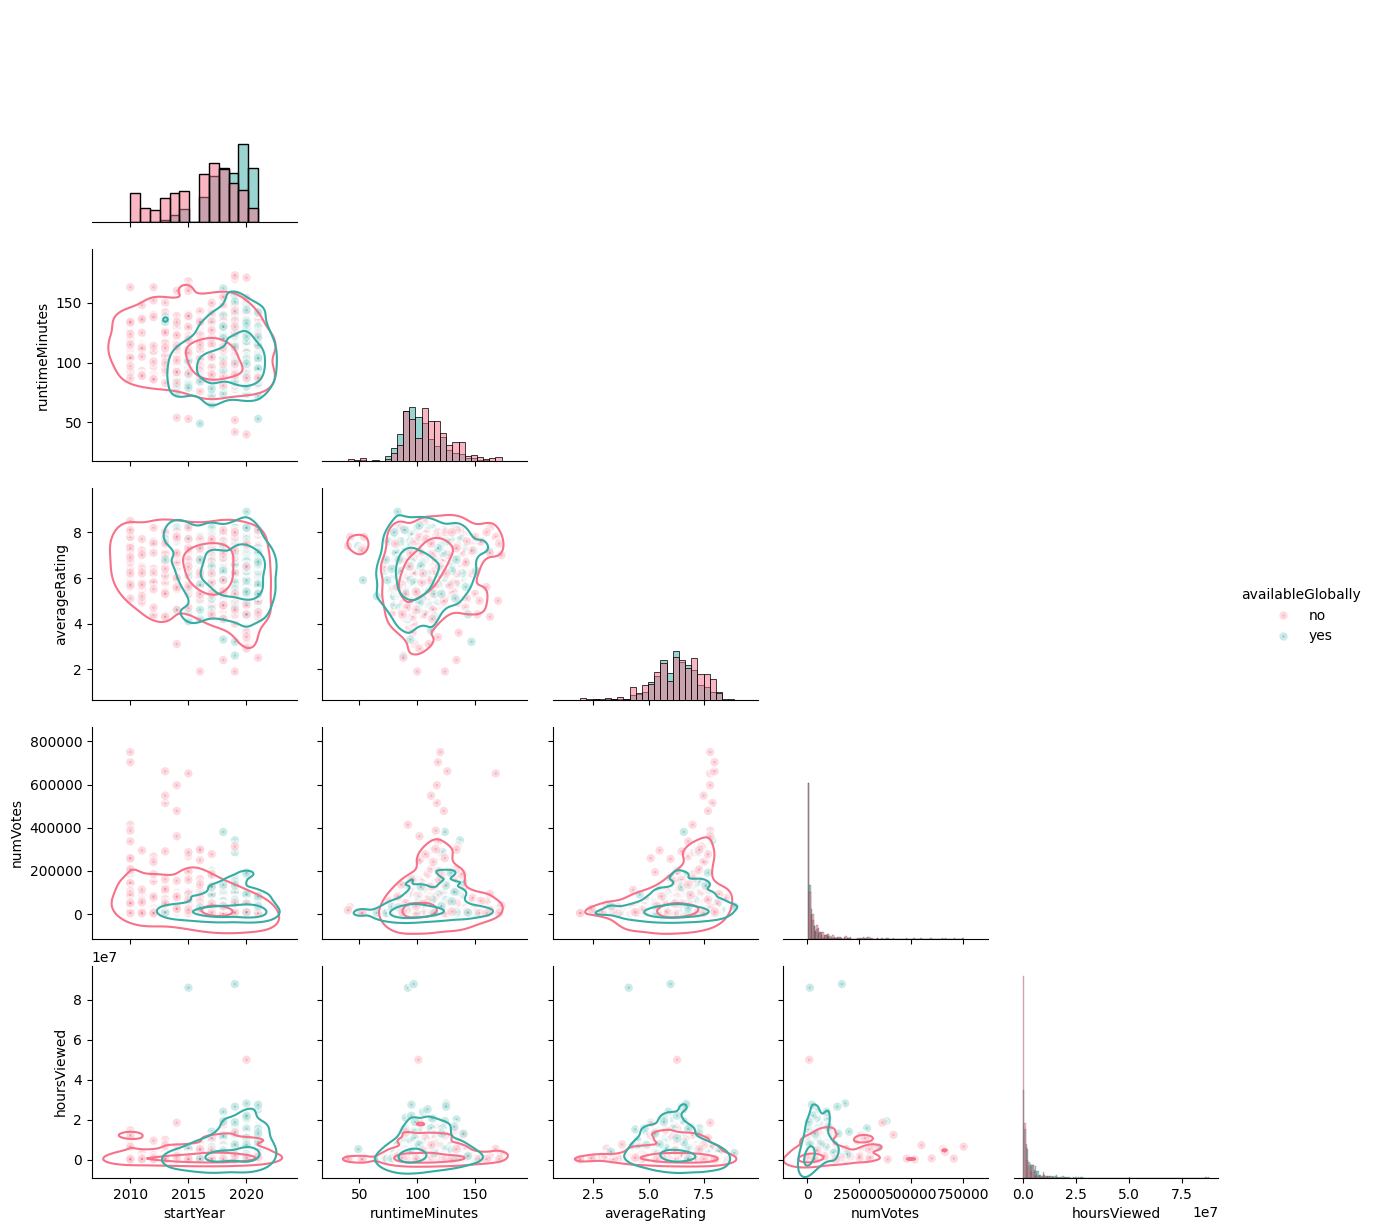

In [20]:
# Create a pairplot
sns.pairplot(
    data=dropped_df.loc[
        (
            dropped_df['runtimeMinutes'] >= 40
        ) & (
            dropped_df['runtimeMinutes'] <= 180
        ) & (
            dropped_df['numVotes'] <= 1000000
        ) & (
            dropped_df['startYear'] >= 2010
        ) & (
            dropped_df['numVotes'] >= 1940
        )
    ],
    kind='scatter',
    hue='availableGlobally',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.5,
        'linewidth': 4
    },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=2
        )
    ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

### hue = 'listedIn'

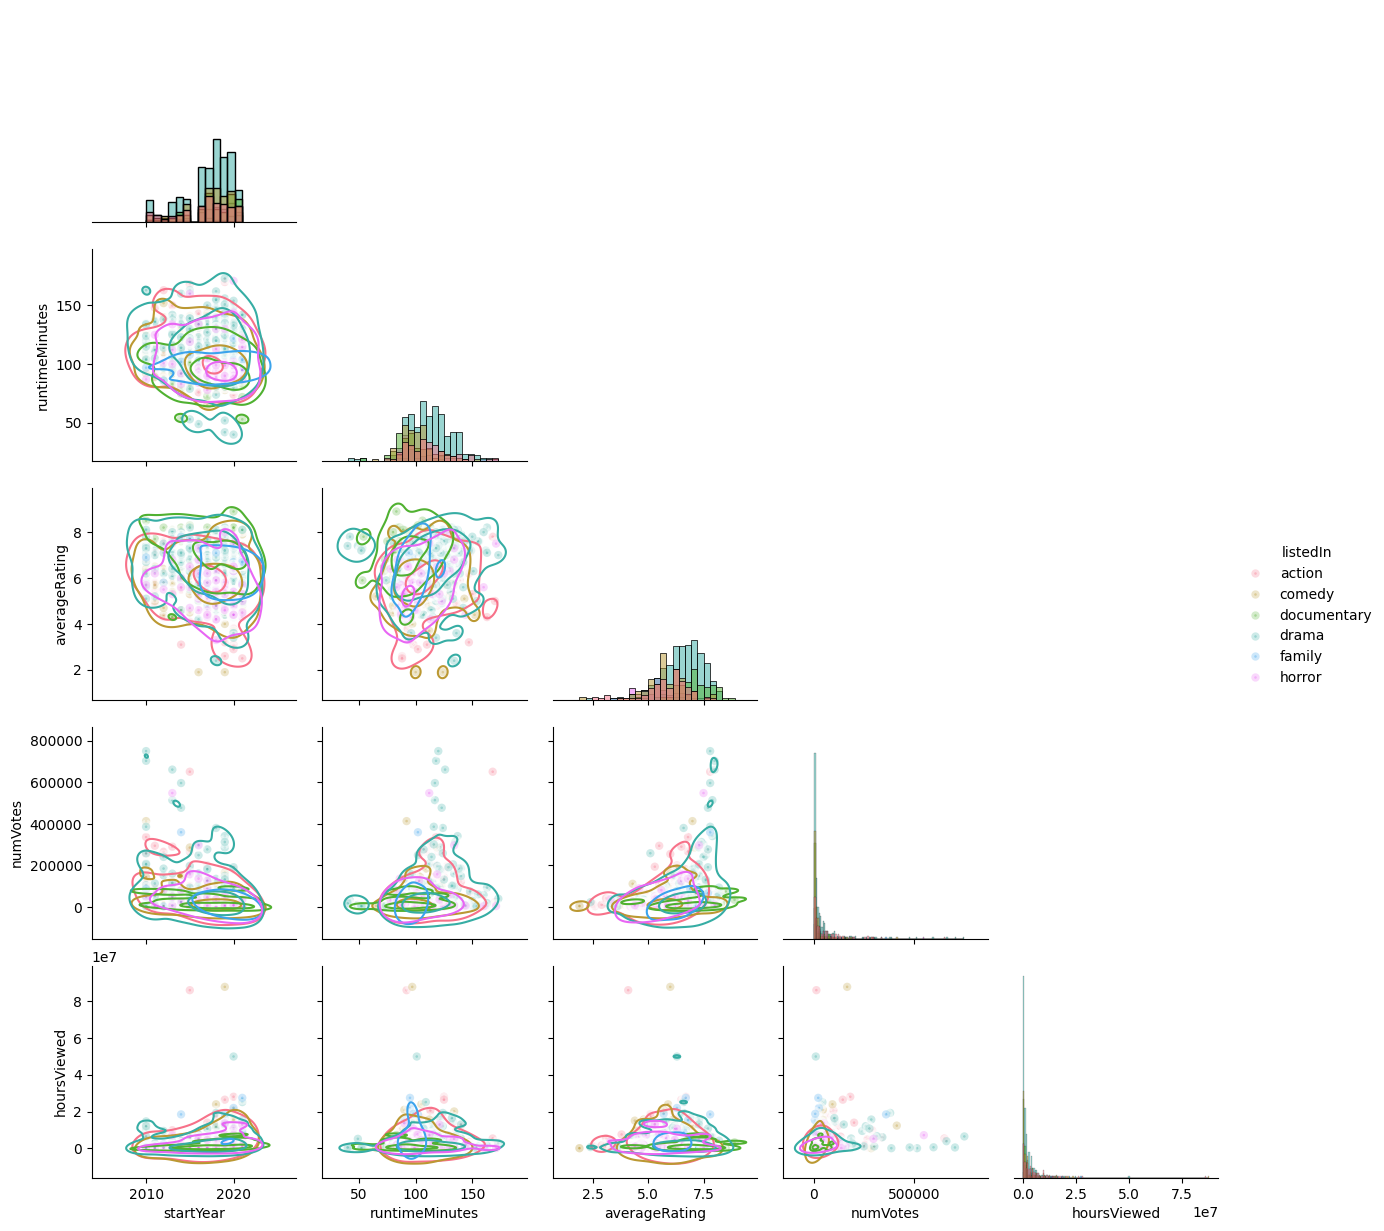

In [21]:
# Create a pairplot
sns.pairplot(
    data=dropped_df.loc[
        (
            dropped_df['runtimeMinutes'] >= 40
        ) & (
            dropped_df['runtimeMinutes'] <= 180
        ) & (
            dropped_df['numVotes'] <= 1000000
        ) & (
            dropped_df['startYear'] >= 2010
        ) & (
            dropped_df['numVotes'] >= 1940
        )
    ],
    kind='scatter',
    hue='listedIn',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.5,
        'linewidth': 4
    },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=6
        )
    ).map_lower(sns.kdeplot, levels=3, color=".2")

plt.show();

# Preliminary Zoom on Dense Clusters

## Movie Titles

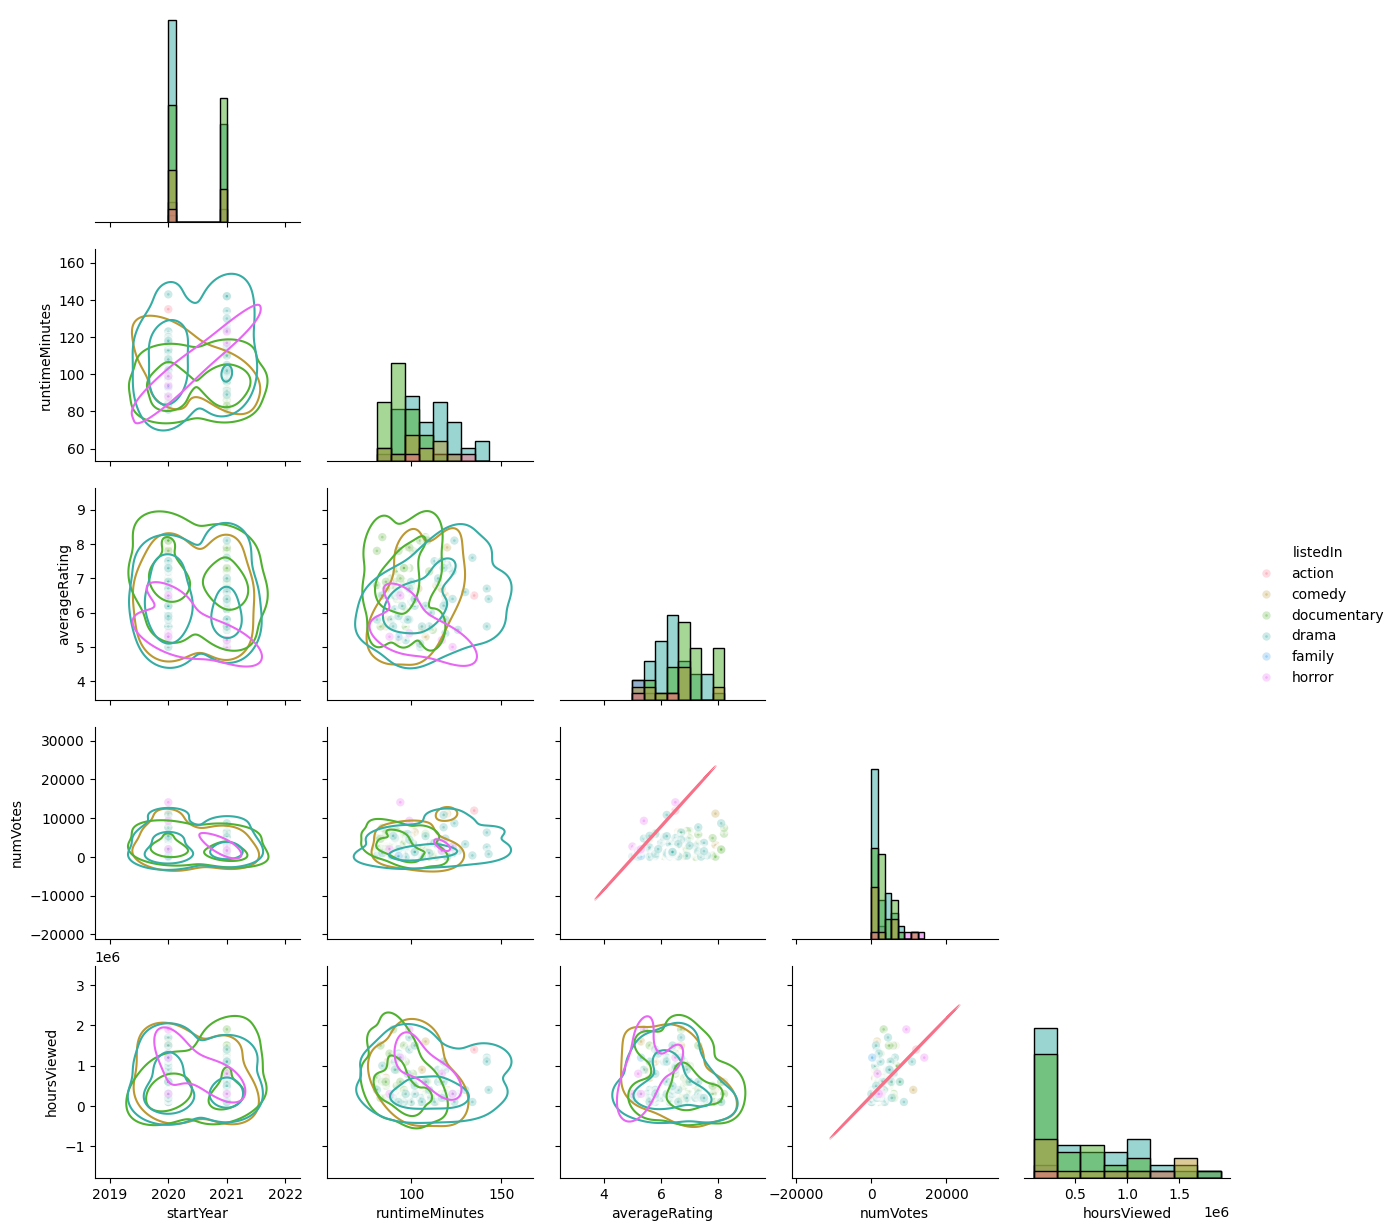

In [22]:
# Create a pairplot
sns.pairplot(
    data=dropped_df.loc[(
        dropped_df['type'] == 'movie'
    ) & (
        dropped_df['averageRating'] >= 5
    ) & (
        dropped_df['runtimeMinutes'] >= 80
    ) & (
        dropped_df['runtimeMinutes'] <= 150
    ) & (
        dropped_df['hoursViewed'] < 2000000
    ) & (
        dropped_df['hoursViewed'] > 0
    ) & (
        dropped_df['numVotes'] > 0
    ) & (
        dropped_df['numVotes'] <= 15000
    ) & (
        dropped_df['startYear'] >= 2020
    ), :].drop(
        labels='type',
        axis=1
    ),
    kind='scatter',
    hue='listedIn',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.5,
        'linewidth': 4,
        },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=6
        )
    ).map_lower(
        sns.kdeplot,
        levels=3,
        color=".2",
        warn_singular=False
    )

plt.show();

## TV Titles

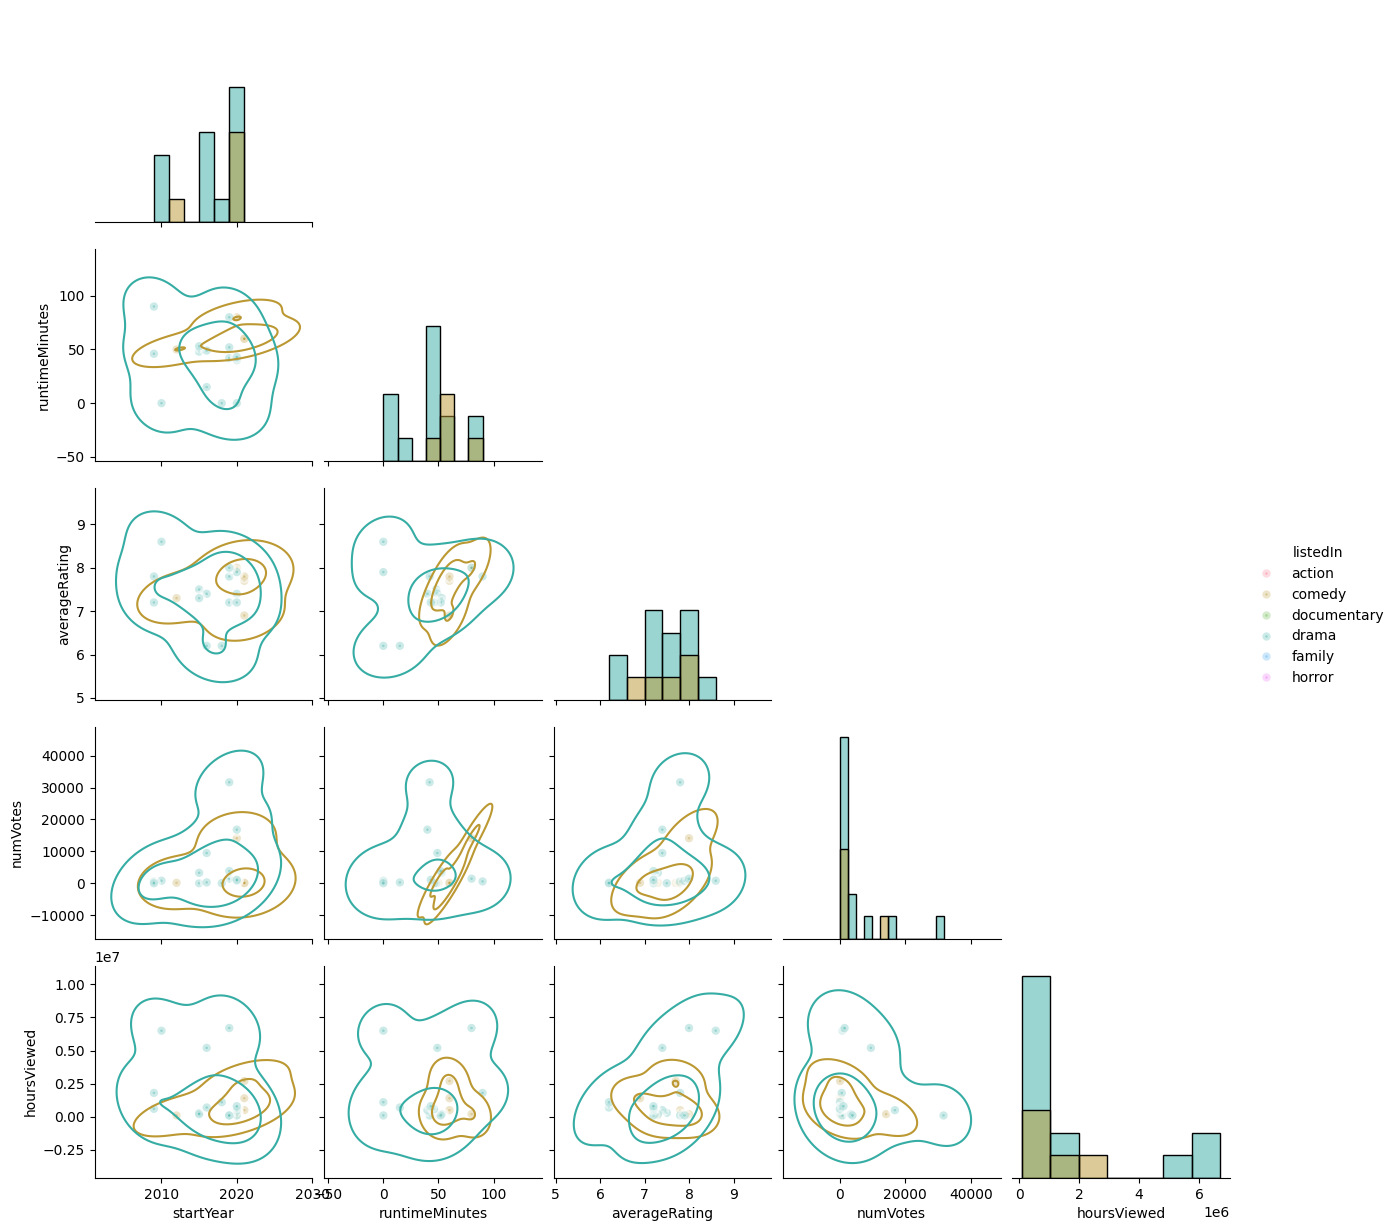

In [23]:
# Create a pairplot
sns.pairplot(
    data=dropped_df.astype({'type': 'object'})[dropped_df['type'] == 'tv show'].loc[
    (
        dropped_df['hoursViewed'] < 8000000
    ) & (
        dropped_df['hoursViewed'] > 0
    ) & (
        dropped_df['numVotes'] > 0
    ) & (
        dropped_df['numVotes'] <= 50000
    ), :].drop(
        labels='type',
        axis=1
    ),
    kind='scatter',
    hue='listedIn',
    diag_kind='hist',
    plot_kws={
        'alpha': 0.5,
        'linewidth': 4,
        },
    corner=True,
    palette=sns.color_palette(
        'husl',
        n_colors=6
        )
    ).map_lower(
        sns.kdeplot,
        levels=3,
        color=".2",
        warn_singular=False
    )

plt.show();

<h1>TODO:</h1>
<ul>
    <li><h3>Reconfigure categories for macro_df</h3></li>
    <li><h3>Reconfigure categories for dropped_df</h3></li>
    <li><h3>Investigate density clusters identified by kde mapping</h3></li>
</ul>

<hr />

# Explore and Merge Cast Ratings Data

In [24]:
cast_df = pd.read_excel('../../data/CAST_LIST-1.xlsx', engine='openpyxl').drop_duplicates(ignore_index=True).replace(
    '\\N',
    ''
).dropna( 
).astype({
    'actor': 'str',
    'nconst': 'str',
    'rating': 'int32',
    'ratingChange': 'int32'
})

# Make the actor column lowercase
cast_df['actor'] = cast_df['actor'].str.lower()

# Check data types and memory usage
cast_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Index: 488 entries, 1 to 1602
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   actor         488 non-null    object
 1   nconst        488 non-null    object
 2   url           488 non-null    object
 3   rating        488 non-null    int32 
 4   ratingChange  488 non-null    int32 
dtypes: int32(2), object(3)
memory usage: 112.1 KB


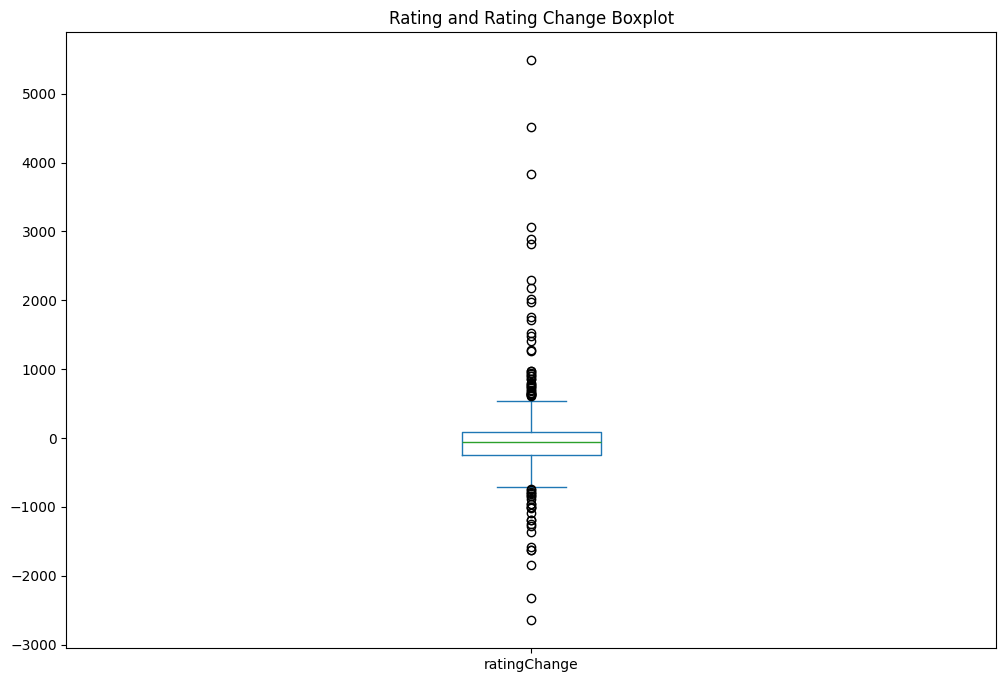

In [25]:
cast_df['ratingChange'].plot(
    kind='box',
    figsize=(12, 8),
    title='Rating and Rating Change Boxplot'
);

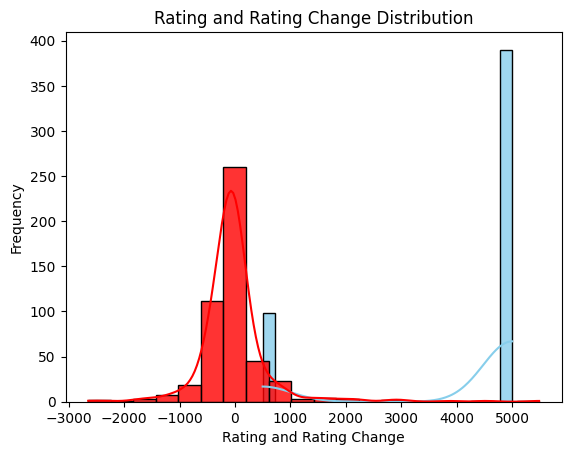

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1)

# Create a histogram
sns.histplot(
    data=cast_df,
    x='rating',
    kde=True,
    bins=20,
    color='skyblue',
    alpha=0.8,
    ax=ax
)

sns.histplot(
    data=cast_df,
    x='ratingChange',
    kde=True,
    bins=20,
    color='red',
    alpha=0.8,
    ax=ax
)

# Set the title and labels
ax.set_title('Rating and Rating Change Distribution')
ax.set_xlabel('Rating and Rating Change')
ax.set_ylabel('Frequency')

plt.show();

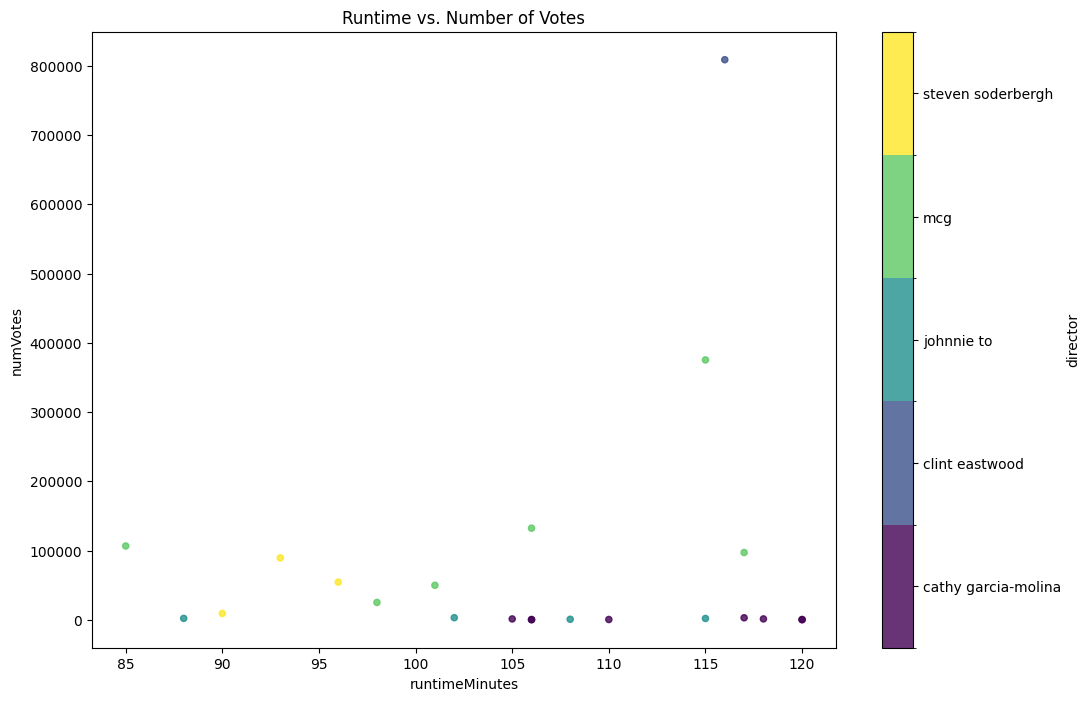

In [27]:
top5Directors = df.director.value_counts().head(5).index.to_list()

director_df = df.loc[df.director.isin(top5Directors), :].copy().astype({'director': 'category'})

director_df.loc[df.runtimeMinutes <= 120, :].plot(
    kind='scatter',
    x='runtimeMinutes',
    y='numVotes',
    alpha=0.8,
    c='director',
    cmap='viridis',
    figsize=(12, 8),
    title='Runtime vs. Number of Votes'
)

plt.show();

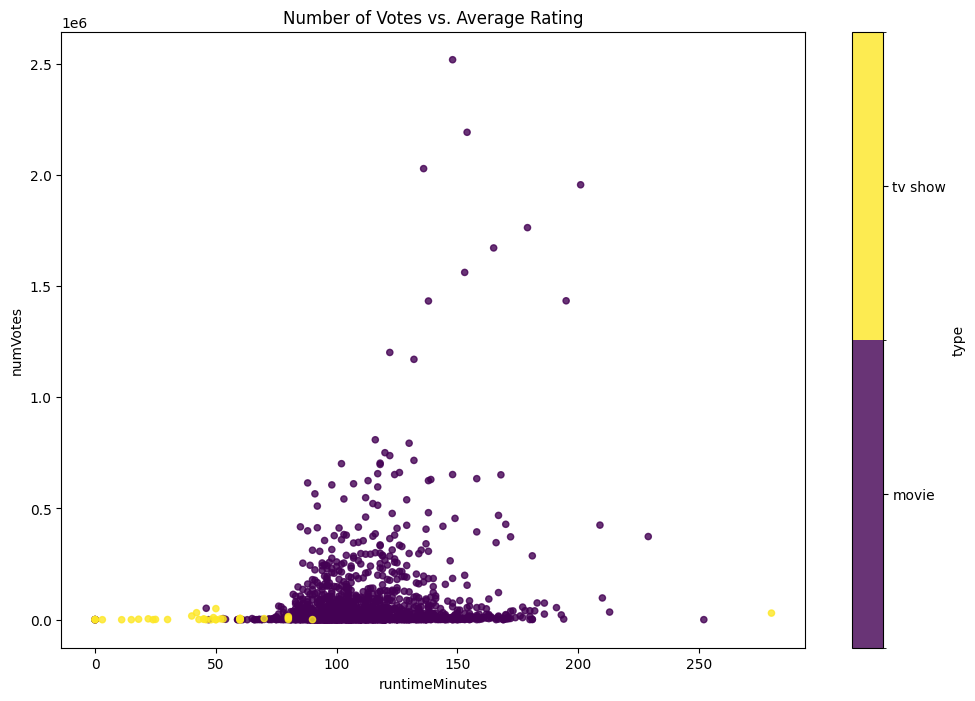

In [28]:
pltdf = df.astype({'type': 'category'}).copy()

pltdf.plot(
    kind='scatter',
    x='runtimeMinutes',
    y='numVotes',
    alpha=0.8,
    c='type',
    cmap='viridis',
    figsize=(12, 8),
    title='Number of Votes vs. Average Rating'
)

plt.show();

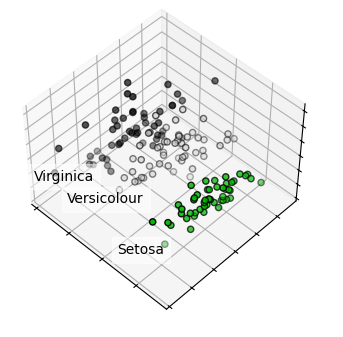

In [29]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np

from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

# Reconfigure Example for Our Data

### Looking at the raw data, with no augmenting engineered features or transformations, make a list of the quantitative columns.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1858 entries, 0 to 1857
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             1858 non-null   object        
 1   primaryTitle       1858 non-null   object        
 2   originalTitle      1858 non-null   object        
 3   startYear          1858 non-null   int32         
 4   runtimeMinutes     1858 non-null   int32         
 5   genres             1858 non-null   object        
 6   averageRating      1858 non-null   float64       
 7   numVotes           1858 non-null   int32         
 8   nfShowId           1858 non-null   object        
 9   type               1858 non-null   object        
 10  title              1858 non-null   object        
 11  director           1804 non-null   object        
 12  cast               1770 non-null   object        
 13  country            1776 non-null   category      
 14  dateAdde

In [31]:
from pandas.api.types import is_numeric_dtype

quant_columns = [col for col in list(df.columns) if is_numeric_dtype(df[col])]
quant_columns

['startYear', 'runtimeMinutes', 'averageRating', 'numVotes', 'hoursViewed']

### As an initial experiment, construct X (train data) from startYear, runtimeMinutes, numVotes, and hoursViewed.
### y (target data) in this experiement will be averageRating.

In [32]:
y, X = df[quant_columns.pop(2)].to_numpy(), df[quant_columns].to_numpy()

### Check Data

In [33]:
X

array([[    2019,       95,     5783,   100000],
       [    2017,      102,    70877,  8700000],
       [    2009,      158,   394795, 18200000],
       ...,
       [    2020,       43,     1094,   800000],
       [    2018,       80,     8267,   200000],
       [    2021,       45,     3674,  2700000]])

In [34]:
X.shape

(1858, 4)

In [35]:
y

array([5.6, 6.2, 5.8, ..., 7.2, 8.1, 8.4])

In [36]:
y.shape

(1858,)

### ~~y needs a second dimension added to its input shape so that individual values can be used during an iteration~~.

In [37]:
# y = np.expand_dims(y, 1)
# y

### A single X, y pair has the form:

In [38]:
pair = next(zip(X, y))
print(f'X: {pair[0]}\ny: {pair[1]}')

X: [  2019     95   5783 100000]
y: 5.6


In [39]:
# np.random.seed(10)

# fig = plt.figure(1, figsize=(4, 3))
# plt.clf()

# ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
# ax.set_position([0, 0, 0.95, 1])


# plt.cla()
# pca = decomposition.PCA(n_components=3)
# pca.fit(X)
# X = pca.transform(X)

# for rating in y:
#     ax.text3D(
#         X[y == rating].mean(),
#         X[y == rating].mean() + 1.5,
#         # X[y == label, 2].mean(),
#         name,
#         horizontalalignment="center",
#         bbox=dict(alpha=0.5, edgecolor="w", facecolor="w")
    # )
        
# for label, rating in enumerate(y):
#     ax.text3D(
#         X[y == label, 0].mean(),
#         X[y == label, 1].mean() + 1.5,
#         X[y == label, 2].mean(),
#         name,
#         horizontalalignment="center",
#         bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
#     )
# Reorder the labels to have colors matching the cluster results
# y = np.choose(y, [1, 2, 0]).astype(float)
# ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

# ax.xaxis.set_ticklabels([])
# ax.yaxis.set_ticklabels([])
# ax.zaxis.set_ticklabels([])


# plt.show();

In [40]:
from sklearn.decomposition import PCA

pca = PCA()

pca.fit(X)

PCA()

In [41]:
pca.explained_variance_ratio_

array([9.99109814e-01, 8.90185871e-04, 1.93325399e-11, 1.94445804e-12])

# Release Date Strong Driver of Engagement
### Might need to reduce or remove if turns out to be more noise than signal